In [46]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [47]:
# Laod the csv dataset
file = "./Resources/games.csv"
game_df = pd.read_csv(file)
game_df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Domains
0,174430,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Strategy Games, Thematic Games"
1,161936,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Strategy Games, Thematic Games"
2,224517,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,Strategy Games
3,167791,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,Strategy Games
4,233078,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Strategy Games, Thematic Games"


In [48]:
# X Features of Max players, play time and complexity only
gameX_df = game_df.drop(['ID','Name', 'Year Published', 'Min Players', 'Min Age', 'Users Rated', 
                         'BGG Rank', 'Owned Users', 'Domains'], axis = 1)
gameX_df.head()

,Max Players,Play Time,Rating Average,Complexity Average
0,4,120,8.79,3.86
1,4,60,8.61,2.84
2,4,120,8.66,3.91
3,5,120,8.43,3.24
4,6,480,8.70,4.22


In [49]:
# Define the feature set
X = gameX_df.copy()
X = X.drop("Rating Average", axis =1).values


print(X)

[[  4.   120.     3.86]
 [  4.    60.     2.84]
 [  4.   120.     3.91]
 ...
 [  4.    30.     1.08]
 [  6.    30.     1.02]
 [  2.     1.     1.16]]


In [50]:
# Define the target set
y = gameX_df["Rating Average"].values
y[:5]

array([8.79, 8.61, 8.66, 8.43, 8.7 ])

In [51]:
# Split into training and testing sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, random_state = 78)

In [52]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15240, 3)
(5080, 3)
(15240,)
(5080,)


In [53]:
# Train the model on training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict the test set results
y_pred = model.predict(X_test)
print(y_pred)

[6.37370032 7.41251604 6.01825938 ... 6.58226494 6.27953126 5.88441379]


In [55]:
# Check prediction of first row
model.predict([[4,120,3.86]])

array([7.39192568])

In [56]:
# Evaluate the model
r2_score(y_test, y_pred)

0.22427920344515961

Text(0.5, 1.0, 'Actual vs Predicted')

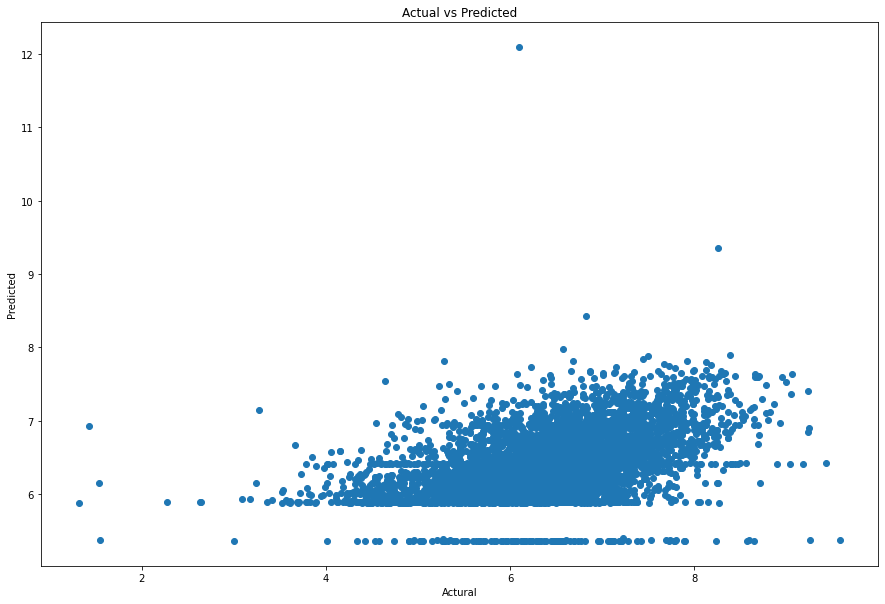

In [57]:
# Plot the results
plt.figure(figsize= (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actural")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

In [45]:
# Predicted values
pred_y_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df.head(20)

,Actual Value,Predicted Value,Difference
0,6.97,6.373700,0.596300
1,7.00,7.412516,-0.412516
2,5.34,6.018259,-0.678259
3,6.12,6.237756,-0.117756
4,5.55,6.206159,-0.656159
5,7.86,7.151360,0.708640
6,4.06,6.566847,-2.506847
7,5.64,6.477842,-0.837842
8,6.79,6.702373,0.087627
9,7.87,7.464984,0.405016
